In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ky

In [2]:
import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)

from GENE_ML.gene_ml.samplers.grid import Grid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from GENE_ML.gene_ml.converters.Tratio import Tratio
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config

config = Config(local=False)
parser = GENE_scan_parser(config)

#sampled_parameters = ['box-kymin', 'units-bref', 'units-nref', 'units-tref', 'nongene-Ti/Te', '_grp_species_1-omt', 'geometry-q0', 'species-omn'] #Geometry, Solver, x0,
#bounds = [(0.05,1), (2,4), (0.0001,10), (0.0001,4), (0.5,1.75), (10,70), (3,6), (5,60)]
ky = ['box-kymin']
bounds = [(0.05,1)]
num_samples = 100
sampler = Grid(parameters=ky, num_samples=num_samples, bounds=bounds)


remote_save_name = "1D_ky"
ex_id = "1D_ky"
num_workers = 4
single_run_timelim = 600
single_run_simtimelim = 600
ky_datagen = DataGen(config, sampler, remote_save_name=remote_save_name, ex_id=ex_id, single_run_timelim=single_run_timelim, single_run_simtimelim=single_run_simtimelim, num_workers=num_workers)

PATHAP GENE_ML/gene_ml/static_sparse_grid_approximations


/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/runners/GENErunner.py:91: SyntaxWarning: invalid escape sequence '\d'
  sbatch_id = re.search('(?<![\d])\d{7}(?![\d])', out).group(0)
/home/djdaniel/DEEPlasma/GENE_ML/gene_ml/runners/GENErunner.py:219: SyntaxWarning: invalid escape sequence '\d'
  batch_id = re.search('(?<![\d])\d{7}(?![\d])', out).group(0)


<class 'paramiko.sftp_file.SFTPFile'>


In [4]:
ky_datagen.executor.pre_run_check()


EXECUTOR, PRINT_CHECK_PARAMETERS
 ----------------------------------------------------------------------------------------------------
PRE RUN CHECK


SINGLE RUN TIMELIM 600 N SAMPLES 25
THE ESTIMATED WALLTIME FOR RUN ex-1D_ky_batch-0 is 00-04:35:00, dd-hh-mm-ss TO RUN 25 SAMPLES
CHECKING IF PROBLEM DIRECTORY EXISTS?
REMOTE PROBLEM DIRECTORY DOES NOT EXIST, CREATING IT NOW: /project/project_462000451/gene/auto_prob_ex-1D_ky_batch-0
RESULT FROM COMMAND: b'set lib path in ./tools/scanscript\nset lib path in ./tools/scanscript\ncreated prob01\ncopied parameters\ncreated link to the GENE executable in the bin directory\n'
PLACING BASE PARAMETERS AND SBATCH TO REMOTE PROBLEM DIRECTORY
ALTERING THE PARAMETERS FILE IN THE REMOTE PROBLEM DIRECTORY
47 timelim 600
    timelim = 10000

    timelim = 600



CODE RUN: SETTING SIMULATION TIME LIMMIT


48 simtimelim 600
    simtimelim = 350

    simtimelim = 600

SBATCH
WRITE SBATCH
#!/bin/bash -l
## LUMI-C (CPU partition) submit script template
## 

In [5]:
ky_datagen.executor.start_runs()

EXECUTING BATCHES
PRE RUN CHECK


SINGLE RUN TIMELIM 600 N SAMPLES 25
THE ESTIMATED WALLTIME FOR RUN ex-1D_ky_batch-0 is 00-04:35:00, dd-hh-mm-ss TO RUN 25 SAMPLES
CHECKING IF PROBLEM DIRECTORY EXISTS?
PLACING BASE PARAMETERS AND SBATCH TO REMOTE PROBLEM DIRECTORY
ALTERING THE PARAMETERS FILE IN THE REMOTE PROBLEM DIRECTORY
47 timelim 600
    timelim = 10000

    timelim = 600



CODE RUN: SETTING SIMULATION TIME LIMMIT


48 simtimelim 600
    simtimelim = 350

    simtimelim = 600

SBATCH
WRITE SBATCH
#!/bin/bash -l
## LUMI-C (CPU partition) submit script template
## Submit via: sbatch submit.cmd (parameters below can be overwritten by command line options)
#SBATCH -t 00-04:35:00  ## wallclock limit, dd-hh:mm:ss
#SBATCH -N 1                       # total number of nodes, 2 CPUs with 64 rank each
#SBATCH --ntasks=128      # 64 per CPU (i.e. 128 per node). Additional 2 hyperthreads disabled
#SBATCH --mem=0                    # Allocate all the memory on each node
#SBATCH -p standard    

In [14]:
ky_datagen.executor.check_finished()


CHECKING IF JOBS FINISHED: ['8215680', '8215681', '8215682', '8215683']
NONE OF THE INPUTED SBATCH IDs ARE RUNNING


EXECUTOR, CHECK FINISHED True


True

In [5]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config()

parser = GENE_scan_parser(config)
ky_dataset = ScanData2(config, 'code_debug_tester',  parser=parser, remote_save_dir=ky_datagen.remote_save_dir, split_ratio=[0.5,0,0.5])#[tr,val,te]
ky_dataset.df

<class 'paramiko.sftp_file.SFTPFile'>
Initialising dataset
DEBUG, PATHS /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/scan.log /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/geneerr.log
HIT SIM LIMIT TEST ON FILE: /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstl

 /home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:359: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,kymin1,growthrate,frequency,run_time,termination_reason
0,0.050000,0.3720,0.1360,58.226,growthrate_converged
1,0.059596,0.3700,-0.0590,68.534,growthrate_converged
2,0.069192,0.4260,0.1230,41.290,growthrate_converged
3,0.078788,0.5100,-0.1060,42.205,growthrate_converged
4,0.088384,0.5080,-0.2770,64.907,growthrate_converged
...,...,...,...,...,...
20,0.961616,2.9350,0.1050,38.406,growthrate_converged
21,0.971212,2.9640,0.0700,38.142,growthrate_converged
22,0.980808,2.9940,0.0260,37.505,growthrate_converged
23,0.990404,3.0230,-0.0100,37.795,growthrate_converged


In [22]:
from GENE_ML.gene_ml.tools import save_pkl
save_pkl('linear_data/ky', ky_dataset.df)

In [6]:
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

gpr_ky = GPR('gpr')
gpr_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_gpr_ky = Results('results_gpr_ky')
results_gpr_ky.growthrate_predict_seen, results_gpr_ky.growthrate_predict_seen_errors = gpr_ky.predict(ky_dataset.x_train)
results_gpr_ky.growthrate_predict_unseen, results_gpr_ky.growthrate_predict_unseen_errors = gpr_ky.predict(ky_dataset.x_test)
    

GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 62.411991760222065
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   10.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -26.555114689239403
Optimization restart 2/3, f = -28.093695464754315
Optimization restart 3/3, f = -28.09369546411901
RESULTING HYPERS:
 
Name : GP regression
Objective : -28.093695464754315
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             | 

In [7]:
from GENE_ML.gene_ml.models.XGBoost import XGBoost
from GENE_ML.gene_ml.results.results import Results

xgb_ky = XGBoost()
xgb_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_xgb_ky = Results('results_xgb_ky')
results_xgb_ky.growthrate_predict_seen = xgb_ky.predict(ky_dataset.x_train)
results_xgb_ky.growthrate_predict_unseen = xgb_ky.predict(ky_dataset.x_test)


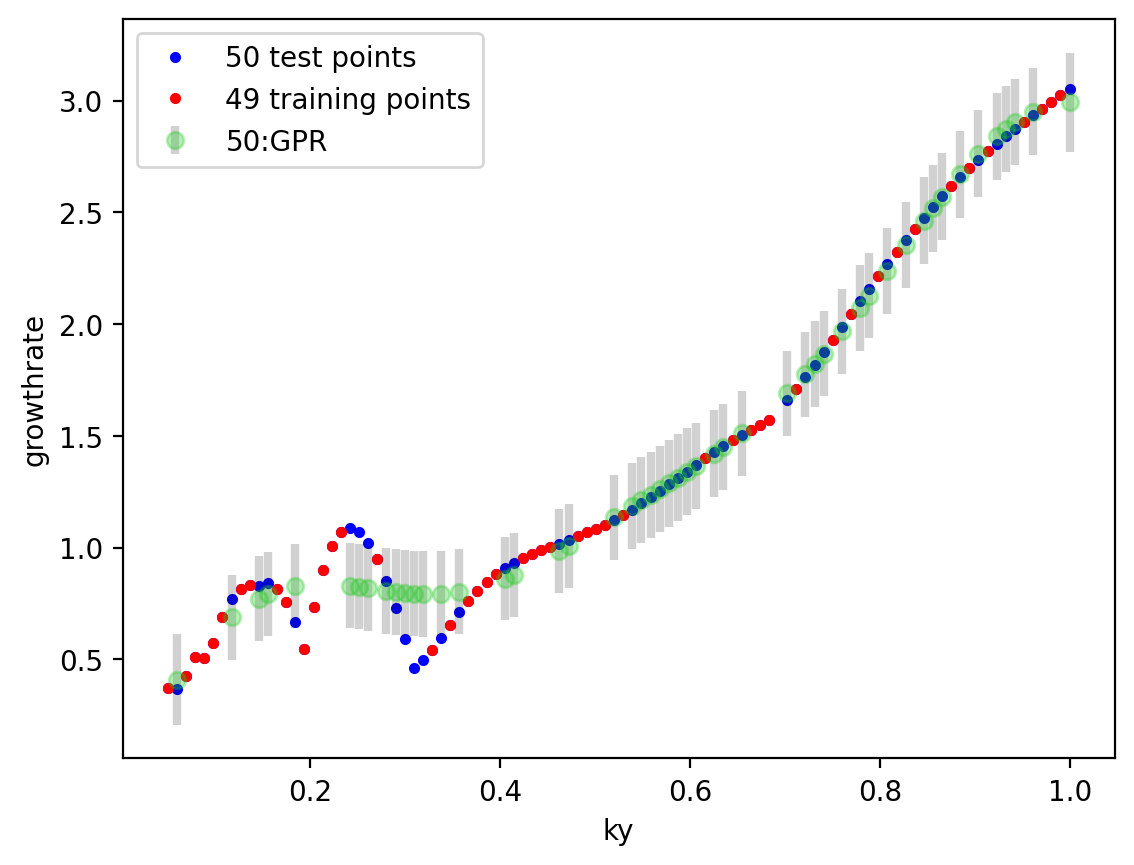

In [11]:
import matplotlib.pyplot as plt

fig_ky = plt.figure(dpi=200)

ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]
plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)-len(ky_train)} test points')
plt.plot(ky_train, ky_dataset.growthrate_train, '.r', label=f'{len(ky_train)} training points')
plt.errorbar(ky_test, results_gpr_ky.growthrate_predict_unseen, yerr=results_gpr_ky.growthrate_predict_unseen_errors, fmt='o', color=[0.1,0.8,0.1,0.3], ecolor=[0.1,0.1,0.1,0.2], elinewidth=3, capsize=0, label=f'{len(ky_test)}:GPR')
# plt.plot(ky_test, results_xgb_ky.growthrate_predict_unseen,'xk', label=f'{len(ky_test)}:XGBoost')
plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()

<class 'paramiko.sftp_file.SFTPFile'>
Initialising dataset
End of SCAN DATA init
Initialising dataset
End of SCAN DATA init
Initialising dataset
End of SCAN DATA init
GPR is a parameterless approach and does not have a training step. Instead the hyperparameters are tuned to the data.
OPTIMISING THE HYPERPERS
CURRENT HYPERS:
 
Name : GP regression
Objective : 10.741227267354196
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   10.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -14.133343636407258
Optimization restart 2/3, f = -14.133343636202877
Optimization restart 3/3, f = -14.133343636419427
RESULTING HYPERS:
 
Name : GP regression
Objective : -14.133343636419427
Number of Parameters : 3
Numb

 /home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:359: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


CURRENT HYPERS:
 
Name : GP regression
Objective : 42.36623893934312
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   10.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -61.82366546071066
Optimization restart 2/3, f = -61.82366546038581
Optimization restart 3/3, f = -61.823665459979736
RESULTING HYPERS:
 
Name : GP regression
Objective : -61.82366546071066
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     3.2224490589396377  |      +ve      |        
  rbf.lengthscale          |     0.3332180653531946  |      +ve      |        
  Gaussian_noise

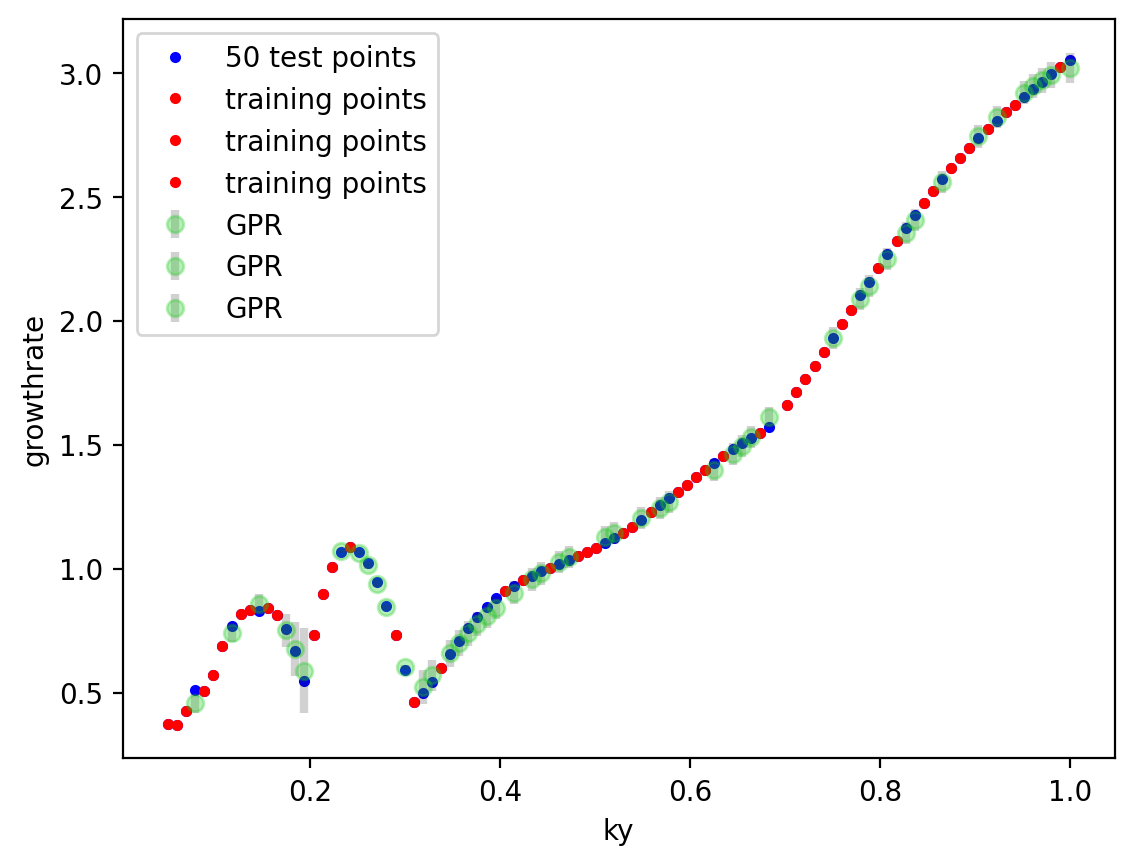

In [12]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
config = Config()

plt.figure(dpi=200)
ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]

plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)-len(ky_train)} test points')

c1 = 16
c2 = 28

inst1 = ScanData2(config)
inst1.split_ratio = [0.5,0,0.5] #tr val te
inst1.set_from_df(ky_dataset.df[0:c1], rest_df_ncol=2)

inst2 = ScanData2(config)
inst2.split_ratio = [0.5,0,0.5]
inst2.set_from_df(ky_dataset.df[c1:c2], rest_df_ncol=2)

inst3 = ScanData2(config)
inst3.split_ratio = [0.5,0,0.5]
inst3.set_from_df(ky_dataset.df[c2:], rest_df_ncol=2)

from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

inst = [inst1,inst2,inst3]
gpr = [GPR('gpr') for i in range(3)]
results = [Results('results') for i in range(3)]
for g, res, dset in zip(gpr, results, inst):
    g.fit(dset.x_train, dset.growthrate_train)
    res.growthrate_predict_seen, res.growthrate_predict_seen_errors = g.predict(dset.x_train)
    res.growthrate_predict_unseen, res.growthrate_predict_unseen_errors = g.predict(dset.x_test)

for res, dset in zip(results, inst):
    ky = [x[0] for x in dset.x]
    ky_train = [x[0] for x in dset.x_train]
    ky_test = [x[0] for x in dset.x_test]
    plt.plot(ky_train, dset.growthrate_train, '.r', label=f'training points')
    plt.errorbar(ky_test, res.growthrate_predict_unseen, yerr=res.growthrate_predict_unseen_errors, fmt='o', color=[0.1,0.8,0.1,0.3], ecolor=[0.1,0.1,0.1,0.2], elinewidth=3, capsize=0, label=f'GPR')

# plt.plot(ky[0:c1], ky_dataset.growthrates[0:c1], '.r', label=f'{len(ky)} GENE points')
# plt.plot(ky[c1:c2], ky_dataset.growthrates[c1:c2], '.g', label=f'{len(ky)} GENE points')

plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()






In [46]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config()

parser = GENE_scan_parser(config)
ky_dataset = ScanData2('code_debug_tester',  parser=parser, config=config, remote_save_dir=ky_datagen.remote_save_dir, split_ratio=[0.7,0,0.3])#[tr,val,te]
ky_dataset.df

from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml.results.results import Results

gpr_ky = GPR('gpr')
gpr_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_gpr_ky = Results('results_gpr_ky')
results_gpr_ky.growthrate_predict_seen, results_gpr_ky.growthrate_predict_seen_errors = gpr_ky.predict(ky_dataset.x_train)
results_gpr_ky.growthrate_predict_unseen, results_gpr_ky.growthrate_predict_unseen_errors = gpr_ky.predict(ky_dataset.x_test)

from GENE_ML.gene_ml.models.XGBoost import XGBoost
from GENE_ML.gene_ml.results.results import Results

xgb_ky = XGBoost()
xgb_ky.fit(ky_dataset.x_train, ky_dataset.growthrate_train)
results_xgb_ky = Results('results_xgb_ky')
results_xgb_ky.growthrate_predict_seen = xgb_ky.predict(ky_dataset.x_train)
results_xgb_ky.growthrate_predict_unseen = xgb_ky.predict(ky_dataset.x_test)

<class 'paramiko.sftp_file.SFTPFile'>
Initialising dataset
DEBUG, PATHS /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/scan.log /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/geneerr.log
HIT SIM LIMIT TEST ON FILE: /scratch/project_462000451/gene_out/gene_auto/1D_ky/ex-1D_ky_batch-0/scanfiles0000/geneerr.log
line   0: *** entering time loop ***

hstlt, len stat and run_count 0 0
line   0: *** entering time loop ***

hstlt, len stat and run_count 1 1
line   0: *** entering time loop ***

hstlt, len stat and run_count 2 2
line   0: *** entering time loop ***

hstlt, len stat and run_count 3 3
line   0: *** entering time loop ***

hstlt, len stat and run_count 4 4
line   0: *** entering time loop ***

hstlt, len stat and run_count 5 5
line   0: *** entering time loop ***

hstlt, len stat and run_count 6 6
line   0: *** entering time loop ***

hstlt, len stat and run_count 7 7
line   0: *** entering time loop ***

hstl

 /home/djdaniel/DEEPlasma/GENE_ML/gene_ml/dataset/ScanData.py:350: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CURRENT HYPERS:
 
Name : GP regression
Objective : 88.12190407491005
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   10.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
OPTIMISING THE HYPERPERS:
Optimization restart 1/3, f = -40.93064987109857
Optimization restart 2/3, f = -83.72256134351352
Optimization restart 3/3, f = -83.72256134359887
RESULTING HYPERS:
 
Name : GP regression
Objective : -83.72256134359887
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |     1.5102452345033746  |      +ve      |        
  rbf.lengthscale          |    0.06400020548499427  |      +ve      |        
  Gaussian_noise.

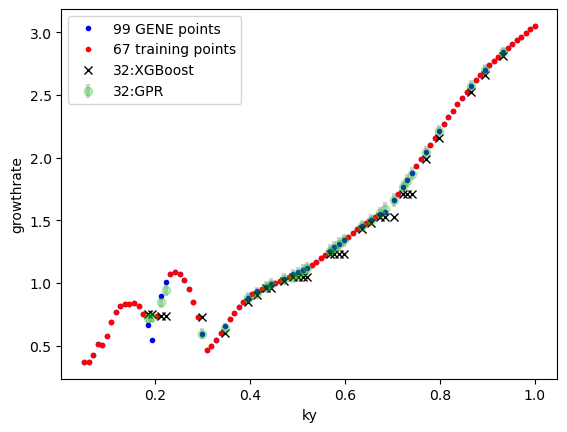

In [47]:

import matplotlib.pyplot as plt

fig_ky = plt.figure()

ky = [x[0] for x in ky_dataset.x]
ky_train = [x[0] for x in ky_dataset.x_train]
ky_test = [x[0] for x in ky_dataset.x_test]
plt.plot(ky, ky_dataset.growthrates, '.b', label=f'{len(ky)} GENE points')
plt.plot(ky_train, ky_dataset.growthrate_train, '.r', label=f'{len(ky_train)} training points')
plt.errorbar(ky_test, results_gpr_ky.growthrate_predict_unseen, yerr=results_gpr_ky.growthrate_predict_unseen_errors, fmt='o', color=[0.1,0.8,0.1,0.3], ecolor=[0.1,0.1,0.1,0.2], elinewidth=3, capsize=0, label=f'{len(ky_test)}:GPR')
plt.plot(ky_test, results_xgb_ky.growthrate_predict_unseen,'xk', label=f'{len(ky_test)}:XGBoost')
plt.xlabel('ky')
plt.ylabel('growthrate')
plt.legend()

# omn

In [ ]:
import sys
import os
pathap = os.path.join('GENE_ML','gene_ml','static_sparse_grid_approximations')
print('PATHAP',pathap)
sys.path.append(pathap)

from GENE_ML.gene_ml.samplers.grid import Grid
from GENE_ML.gene_ml.datagen.datagen import DataGen
from GENE_ML.gene_ml.converters.Tratio import Tratio
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config

config = Config(local=False)
parser = GENE_scan_parser(config)

#sampled_parameters = ['box-kymin', 'units-bref', 'units-nref', 'units-tref', 'nongene-Ti/Te', '_grp_species_1-omt', 'geometry-q0', 'species-omn'] #Geometry, Solver, x0,
#bounds = [(0.05,1), (2,4), (0.0001,10), (0.0001,4), (0.5,1.75), (10,70), (3,6), (5,60)]
ky = ['box-kymin']
bounds = [(0.05,1)]
num_samples = 100
sampler = Grid(parameters=ky, num_samples=num_samples, bounds=bounds)


remote_save_name = "1D_omn"
ex_id = "1D_omn"
num_workers = 4
single_run_timelim = 600
single_run_simtimelim = 600
omn_datagen = DataGen(config, sampler, remote_save_name=remote_save_name, ex_id=ex_id, single_run_timelim=single_run_timelim, single_run_simtimelim=single_run_simtimelim, num_workers=num_workers)

In [ ]:
omn_datagen.executor.start_runs()

In [ ]:
omn_datagen.executor.check_finished()

In [ ]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData2
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser
from config import Config
config = Config()

parser = GENE_scan_parser(config)
omn_dataset = ScanData2('code_debug_tester',  parser=parser, config=config, remote_save_dir=omn_datagen.remote_save_dir, split_ratio=[0.1,0,0.9])#[tr,val,te]

In [ ]:
omn_dataset.save('linear_data/omn')